## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [563]:
import pandas as pd

data = pd.read_csv("사교육비조사.csv", encoding='CP949')

1.2 불러온 데이터의 요약 정보를 출력하세요.

In [564]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51100 entries, 0 to 51099
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        51100 non-null  int64  
 1   행정구역시도코드      51100 non-null  int64  
 2   학교급구분코드       51100 non-null  int64  
 3   방과후학교참여여부     51100 non-null  int64  
 4   방과후학교참여시간수    51100 non-null  float64
 5   EBS교재비        51100 non-null  float64
 6   사교육참여시간수      51100 non-null  float64
 7   일반교과사교육시간수    51100 non-null  float64
 8   예체능사교육시간수     51100 non-null  float64
 9   사교육비총비용       51100 non-null  float64
 10  총자녀수          51100 non-null  int64  
 11  학생성적구분코드      24351 non-null  float64
 12  부_교육정도코드      48372 non-null  float64
 13  모_교육정도코드      49315 non-null  float64
 14  부모경제활동코드      50891 non-null  float64
 15  월평균가구소득코드     51099 non-null  float64
 16  진학희망고등학교유형코드  26749 non-null  float64
dtypes: float64(12), int64(5)
memory usage: 6.6 MB


1.2 데이터의 기술통계량을 출력하세요.

In [565]:
data.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,51100.000000,51100.000000,51100.000000,51100.000000,51100.000000,51100.000000,51100.000000,51100.000000,51100.000000,51100.000000,51100.000000,24351.000000,48372.000000,49315.000000,50891.000000,51099.000000,26749.000000
mean,2.141977,23.898689,2.291761,1.515166,2.297697,3.756370,6.230620,4.438023,1.733353,398.792284,2.112407,3.179705,44.677127,42.449458,2.255055,4.491164,1.956372
std,0.721429,7.724207,0.933021,0.499775,3.622955,9.849371,6.433619,5.600037,3.703571,440.238990,0.680376,1.249716,11.486666,10.641424,0.957101,2.141940,1.562229
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,2.000000,24.000000,2.000000,2.000000,0.000000,0.000000,5.000000,2.000000,0.000000,295.097605,2.000000,3.000000,51.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,31.000000,3.000000,2.000000,3.333333,0.000000,10.000000,8.000000,2.000000,633.916883,2.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,3.000000,35.000000,4.000000,2.000000,40.000000,158.608052,82.333333,76.000000,53.000000,5374.156458,9.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [566]:
data_3 = data[data['학교급구분코드'] == 3]
data_3['학교급구분코드'].value_counts()

학교급구분코드
3    20591
Name: count, dtype: int64

In [567]:
data_3

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,3,1,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,1,2.0,71.0,61.0,2.0,4.0,NaN
4921,1,11,3,1,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,2,3.0,51.0,51.0,3.0,6.0,NaN
4922,1,11,3,1,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,2,5.0,31.0,41.0,3.0,4.0,NaN
4923,1,11,3,1,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,2,5.0,51.0,51.0,3.0,1.0,NaN
4924,1,11,3,1,0.333333,0.000000,12.000000,12.000000,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50865,3,35,3,2,0.000000,7.930403,7.666667,7.666667,0.0,851.825811,1,1.0,51.0,51.0,1.0,5.0,NaN
50866,3,35,3,2,0.000000,7.930403,9.000000,9.000000,0.0,772.586201,2,3.0,51.0,51.0,3.0,4.0,NaN
50867,3,35,3,2,0.000000,9.054785,0.000000,0.000000,0.0,0.000000,3,2.0,31.0,31.0,3.0,1.0,NaN
50868,3,35,3,2,0.000000,9.448471,0.000000,0.000000,0.0,0.000000,1,1.0,51.0,51.0,1.0,7.0,NaN


In [568]:
data = data_3.drop('학교급구분코드', axis=1)

In [569]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20591 entries, 4920 to 50869
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        20591 non-null  int64  
 1   행정구역시도코드      20591 non-null  int64  
 2   방과후학교참여여부     20591 non-null  int64  
 3   방과후학교참여시간수    20591 non-null  float64
 4   EBS교재비        20591 non-null  float64
 5   사교육참여시간수      20591 non-null  float64
 6   일반교과사교육시간수    20591 non-null  float64
 7   예체능사교육시간수     20591 non-null  float64
 8   사교육비총비용       20591 non-null  float64
 9   총자녀수          20591 non-null  int64  
 10  학생성적구분코드      20591 non-null  float64
 11  부_교육정도코드      19567 non-null  float64
 12  모_교육정도코드      20047 non-null  float64
 13  부모경제활동코드      20538 non-null  float64
 14  월평균가구소득코드     20591 non-null  float64
 15  진학희망고등학교유형코드  0 non-null      float64
dtypes: float64(12), int64(4)
memory usage: 2.7 MB


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [570]:
data = data.drop(['지역구분코드','행정구역시도코드'], axis=1)

In [571]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20591 entries, 4920 to 50869
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여여부     20591 non-null  int64  
 1   방과후학교참여시간수    20591 non-null  float64
 2   EBS교재비        20591 non-null  float64
 3   사교육참여시간수      20591 non-null  float64
 4   일반교과사교육시간수    20591 non-null  float64
 5   예체능사교육시간수     20591 non-null  float64
 6   사교육비총비용       20591 non-null  float64
 7   총자녀수          20591 non-null  int64  
 8   학생성적구분코드      20591 non-null  float64
 9   부_교육정도코드      19567 non-null  float64
 10  모_교육정도코드      20047 non-null  float64
 11  부모경제활동코드      20538 non-null  float64
 12  월평균가구소득코드     20591 non-null  float64
 13  진학희망고등학교유형코드  0 non-null      float64
dtypes: float64(12), int64(2)
memory usage: 2.4 MB


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [572]:
data['방과후학교참여여부'].value_counts()

방과후학교참여여부
1    11444
2     9147
Name: count, dtype: int64

In [574]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 생성
encoder = OneHotEncoder()

# 원핫인코딩은 2차원 입력만을 받음으로 변환이 필요
# '방과후학교참여여부' 열을 numpy 배열로 변환 2차원 배열로 reshape
target_reshaped = data['방과후학교참여여부'].values.reshape(-1, 1)

# One-Hot Encoding 적용
one_hot_encoded = encoder.fit_transform(target_reshaped).toarray()

# One-Hot Encoding 결과를 DataFrame으로 변환
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=['방과후학교_참여', '방과후학교_미참여'])

# 인코딩된 데이터를 원본 DataFrame에 연결
data = pd.concat([data, one_hot_encoded_df], axis=1)


In [575]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33221 entries, 4920 to 20590
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여여부     20591 non-null  float64
 1   방과후학교참여시간수    20591 non-null  float64
 2   EBS교재비        20591 non-null  float64
 3   사교육참여시간수      20591 non-null  float64
 4   일반교과사교육시간수    20591 non-null  float64
 5   예체능사교육시간수     20591 non-null  float64
 6   사교육비총비용       20591 non-null  float64
 7   총자녀수          20591 non-null  float64
 8   학생성적구분코드      20591 non-null  float64
 9   부_교육정도코드      19567 non-null  float64
 10  모_교육정도코드      20047 non-null  float64
 11  부모경제활동코드      20538 non-null  float64
 12  월평균가구소득코드     20591 non-null  float64
 13  진학희망고등학교유형코드  0 non-null      float64
 14  방과후학교_참여      20591 non-null  float64
 15  방과후학교_미참여     20591 non-null  float64
dtypes: float64(16)
memory usage: 4.3 MB


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [576]:
# 결측값 갯수 출력
data['EBS교재비'].isnull().sum() 

12630

In [578]:
data = data.drop('EBS교재비', axis=1)

2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

plt.rc('font', family = 'Malgun Gothic') # window
plt.rc('font', size = 20)

warnings.filterwarnings('ignore') # 출력문구 표시 x

<Axes: xlabel='학생성적구분코드', ylabel='사교육비총비용'>

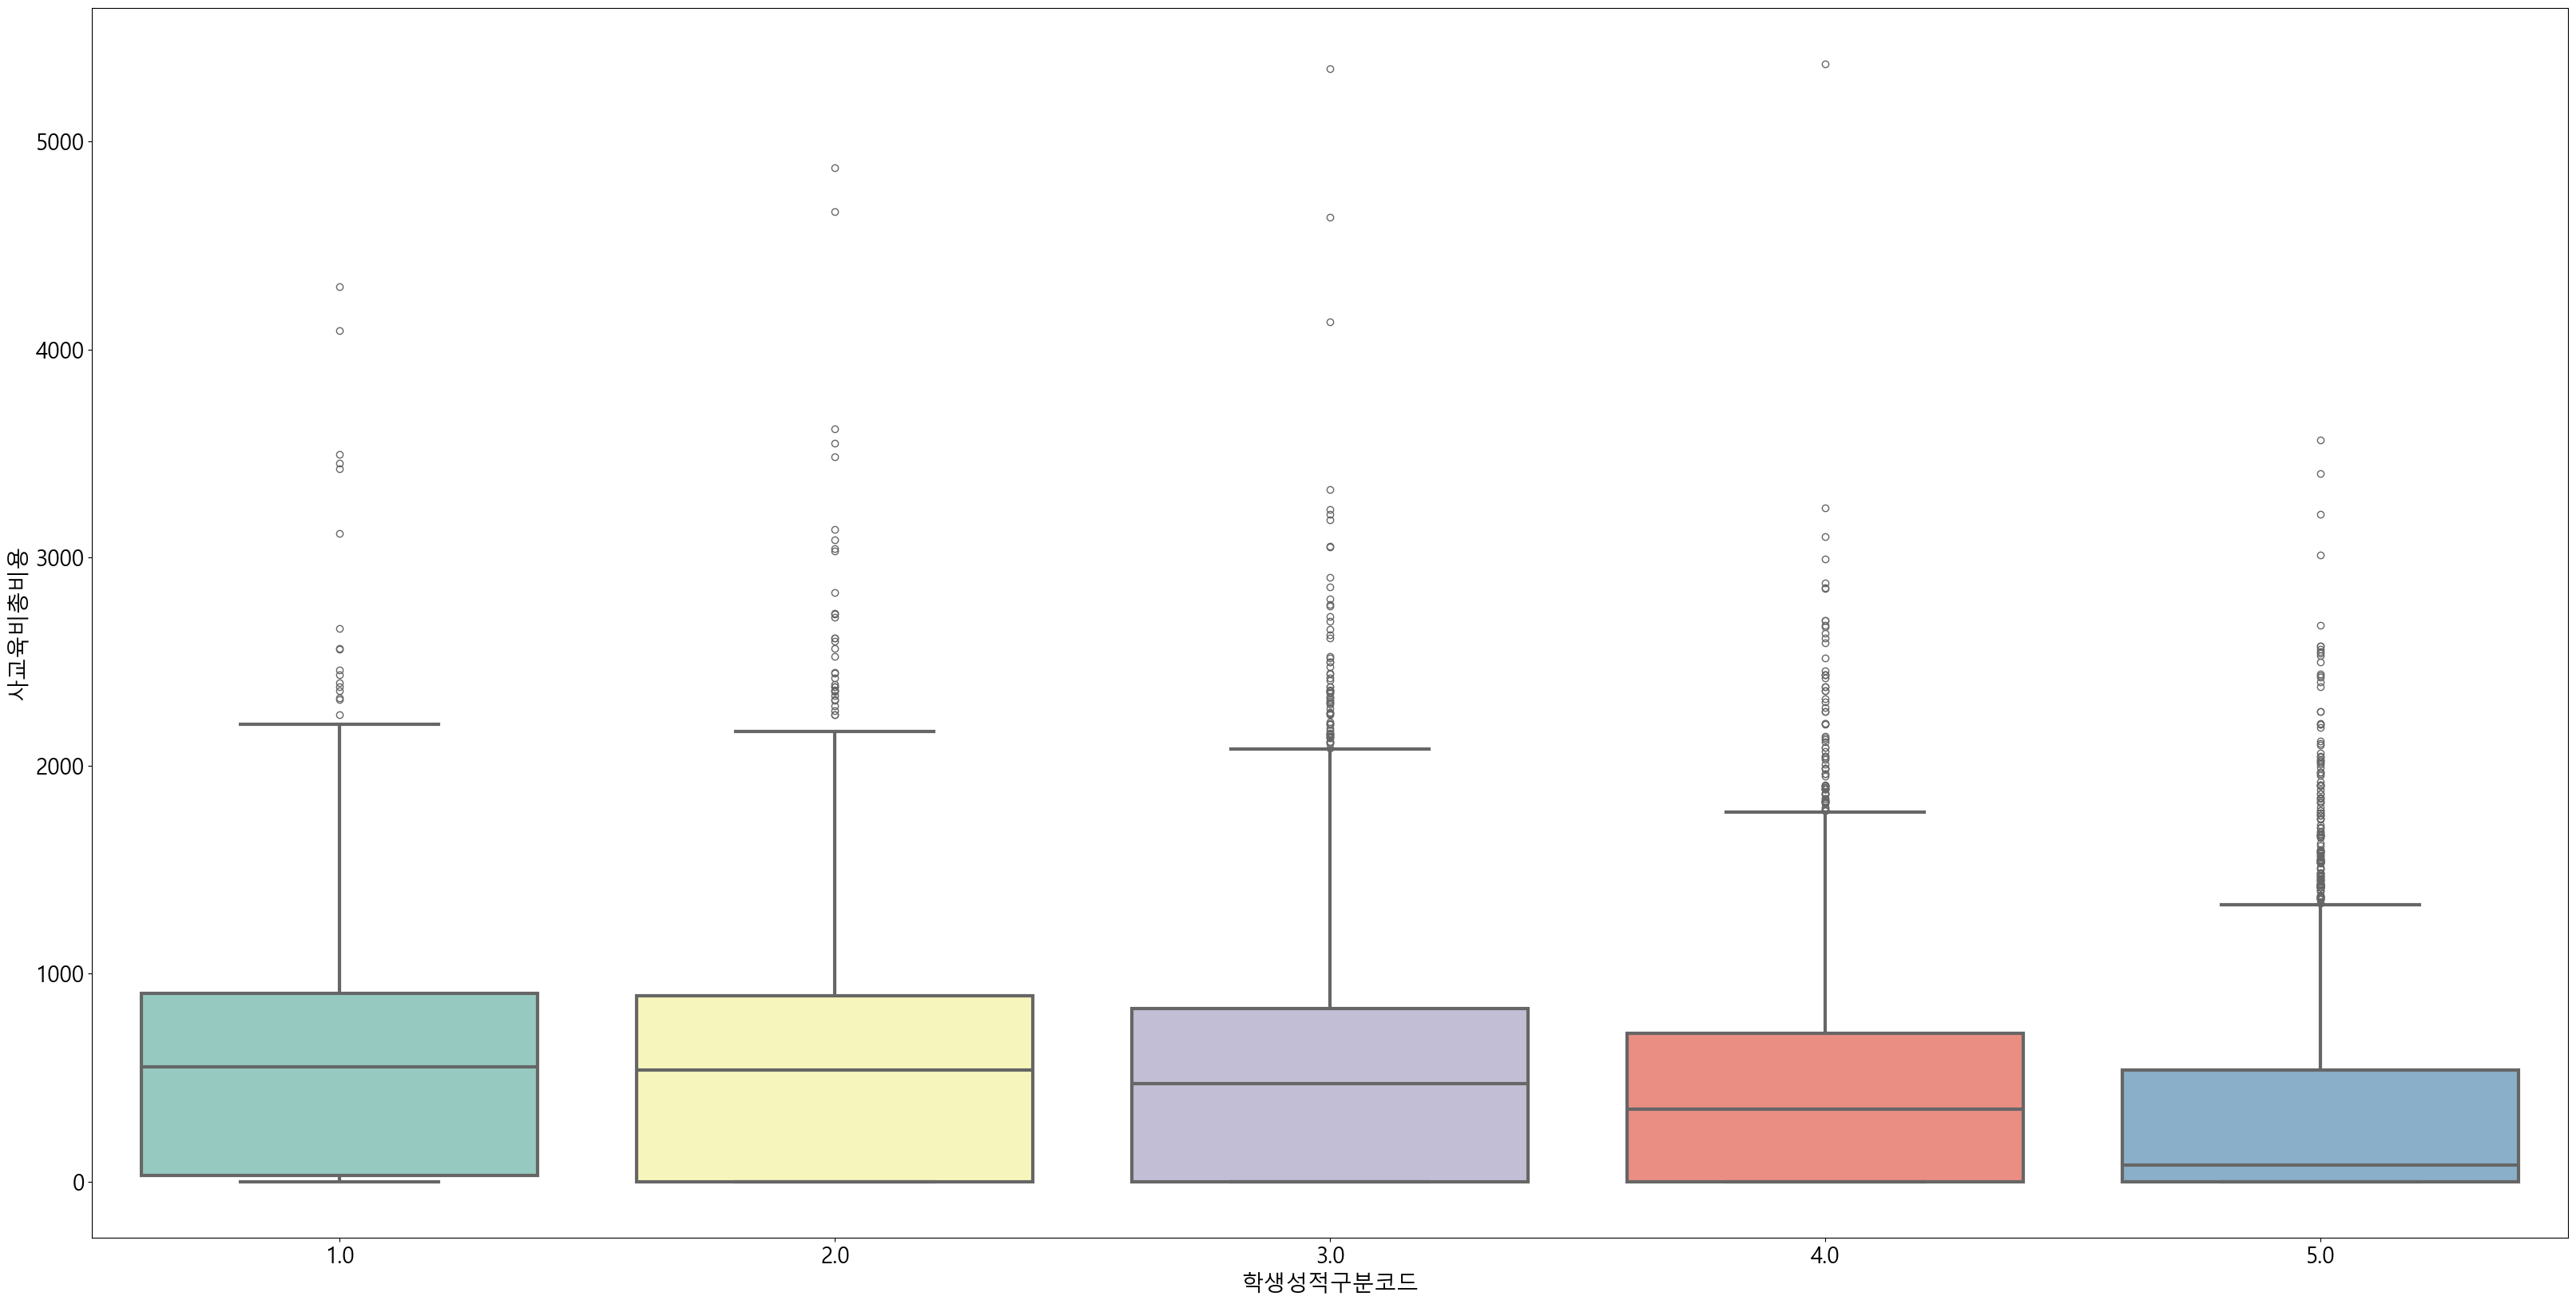

In [580]:
plt.figure(figsize=(40, 20))

sns.boxplot(x='학생성적구분코드', 
            y='사교육비총비용', 
            data=data, 
            palette="Set3", 
            linewidth=3
            )

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [581]:
data['학생성적구분코드'].value_counts()

학생성적구분코드
3.0    6167
2.0    4167
4.0    4128
5.0    4002
1.0    2127
Name: count, dtype: int64

In [582]:
# 1, 2 -> 상위 / 4, 5 -> 하위
data['구분코드_범주화'] = data['학생성적구분코드'].map({1: '상위', 2: '상위',4: '하위', 5: '하위'})

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33221 entries, 4920 to 20590
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여여부     20591 non-null  float64
 1   방과후학교참여시간수    20591 non-null  float64
 2   사교육참여시간수      20591 non-null  float64
 3   일반교과사교육시간수    20591 non-null  float64
 4   예체능사교육시간수     20591 non-null  float64
 5   사교육비총비용       20591 non-null  float64
 6   총자녀수          20591 non-null  float64
 7   학생성적구분코드      20591 non-null  float64
 8   부_교육정도코드      19567 non-null  float64
 9   모_교육정도코드      20047 non-null  float64
 10  부모경제활동코드      20538 non-null  float64
 11  월평균가구소득코드     20591 non-null  float64
 12  진학희망고등학교유형코드  0 non-null      float64
 13  방과후학교_참여      20591 non-null  float64
 14  방과후학교_미참여     20591 non-null  float64
 15  구분코드_범주화      14424 non-null  object 
dtypes: float64(15), object(1)
memory usage: 4.3+ MB


In [583]:
data['구분코드_범주화'].value_counts()

구분코드_범주화
하위    8130
상위    6294
Name: count, dtype: int64

In [584]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHotEncoder 생성
encoder = OneHotEncoder(sparse_output=False)

# '구분코드_범주화' 열을 2차원 배열로 변환 (OneHotEncoder는 2차원 입력을 요구함)
target_reshaped = data['구분코드_범주화'].values.reshape(-1, 1)

# One-Hot Encoding 적용
one_hot_encoded = encoder.fit_transform(target_reshaped)

columns = encoder.get_feature_names_out(input_features=['구분코드_범주화'])

# One-Hot Encoding 결과를 DataFrame으로 변환
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=columns)

# 인코딩된 데이터를 원본 DataFrame에 연결
data = pd.concat([data, one_hot_encoded_df], axis=1)


In [585]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40396 entries, 4920 to 32373
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여여부     20591 non-null  float64
 1   방과후학교참여시간수    20591 non-null  float64
 2   사교육참여시간수      20591 non-null  float64
 3   일반교과사교육시간수    20591 non-null  float64
 4   예체능사교육시간수     20591 non-null  float64
 5   사교육비총비용       20591 non-null  float64
 6   총자녀수          20591 non-null  float64
 7   학생성적구분코드      20591 non-null  float64
 8   부_교육정도코드      19567 non-null  float64
 9   모_교육정도코드      20047 non-null  float64
 10  부모경제활동코드      20538 non-null  float64
 11  월평균가구소득코드     20591 non-null  float64
 12  진학희망고등학교유형코드  0 non-null      float64
 13  방과후학교_참여      20591 non-null  float64
 14  방과후학교_미참여     20591 non-null  float64
 15  구분코드_범주화      14424 non-null  object 
 16  구분코드_범주화_상위   33221 non-null  float64
 17  구분코드_범주화_하위   33221 non-null  float64
 18  구분코드_범주화_nan  33221 non-null

In [586]:
data = data.drop(['구분코드_범주화', '구분코드_범주화_nan'], axis=1)

In [587]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40396 entries, 4920 to 32373
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여여부     20591 non-null  float64
 1   방과후학교참여시간수    20591 non-null  float64
 2   사교육참여시간수      20591 non-null  float64
 3   일반교과사교육시간수    20591 non-null  float64
 4   예체능사교육시간수     20591 non-null  float64
 5   사교육비총비용       20591 non-null  float64
 6   총자녀수          20591 non-null  float64
 7   학생성적구분코드      20591 non-null  float64
 8   부_교육정도코드      19567 non-null  float64
 9   모_교육정도코드      20047 non-null  float64
 10  부모경제활동코드      20538 non-null  float64
 11  월평균가구소득코드     20591 non-null  float64
 12  진학희망고등학교유형코드  0 non-null      float64
 13  방과후학교_참여      20591 non-null  float64
 14  방과후학교_미참여     20591 non-null  float64
 15  구분코드_범주화_상위   33221 non-null  float64
 16  구분코드_범주화_하위   33221 non-null  float64
dtypes: float64(17)
memory usage: 5.5 MB


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

- 답안  
Label Encoding 의 경우 문자열의 값을 숫자(번호)로 변환하는 과정이라면  
One Hot Encoding 의 경우 변수의 차원을 늘려 변수에 해당하는 값이면 1을 부여 아니면 0을 부여하는 과정

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [588]:
# 학생성적구분코드 변수는 다중공산성 문제 발생 안할것으로 생각되어 제거안함
# 방과후학교참여여부 변수만 제거
data = data.drop(['방과후학교참여여부', '방과후학교_미참여'], axis=1)

In [589]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40396 entries, 4920 to 32373
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여시간수    20591 non-null  float64
 1   사교육참여시간수      20591 non-null  float64
 2   일반교과사교육시간수    20591 non-null  float64
 3   예체능사교육시간수     20591 non-null  float64
 4   사교육비총비용       20591 non-null  float64
 5   총자녀수          20591 non-null  float64
 6   학생성적구분코드      20591 non-null  float64
 7   부_교육정도코드      19567 non-null  float64
 8   모_교육정도코드      20047 non-null  float64
 9   부모경제활동코드      20538 non-null  float64
 10  월평균가구소득코드     20591 non-null  float64
 11  진학희망고등학교유형코드  0 non-null      float64
 12  방과후학교_참여      20591 non-null  float64
 13  구분코드_범주화_상위   33221 non-null  float64
 14  구분코드_범주화_하위   33221 non-null  float64
dtypes: float64(15)
memory usage: 4.9 MB


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

- 답안  
1. 다중공산성이란? 독립변수들 간에 강한 상관관계가 나타나는 문제  
2. 해당변수의 범주에 속하면 1 아니면 0을 할당하는데 이러한 과정에 있어 더미변수간에 독립성이 위배되어 다중공산성 문제가 발생  



2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [590]:
# 필요한 열만 선택
data_heat = data[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']]

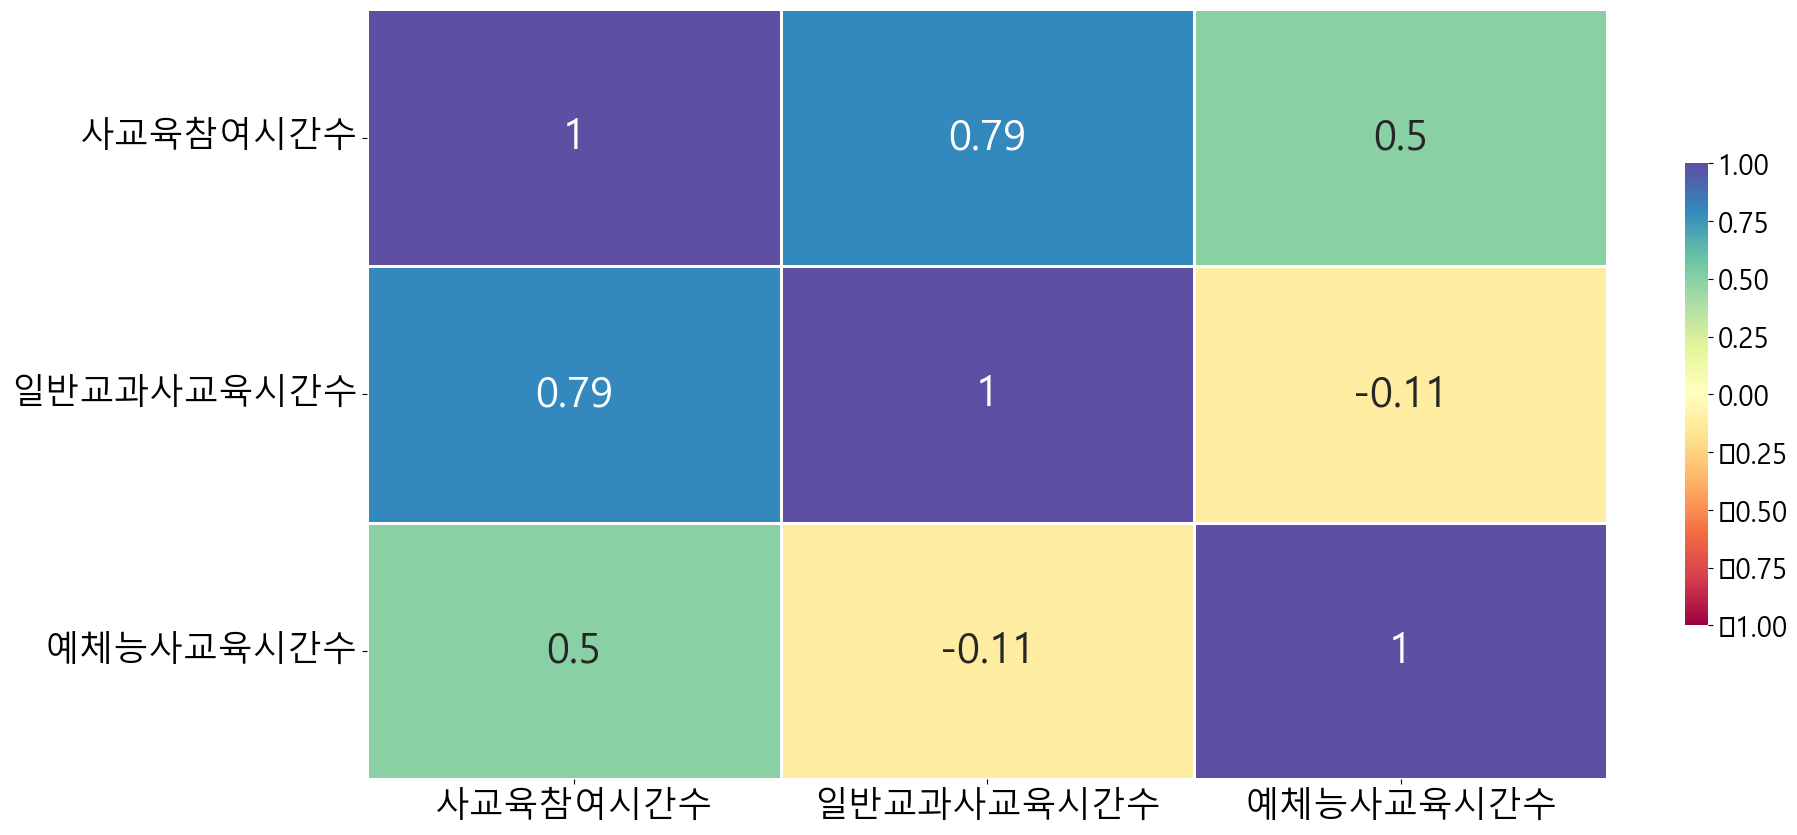

In [591]:
# 숫자형 변수들 간의 상관관계 계산
corr = data_heat.corr()

# 히트맵
plt.figure(figsize=(20, 10))

sns.heatmap(corr,
            annot=True, # 수치(상관관계) 표시
            annot_kws = {'size':30}, # 수치표시 사이즈
            cmap='Spectral', 
            vmin=-1, 
            vmax=1,
            linewidths=2, 
            cbar_kws={"shrink": .6} # 색상 바 추가 크기 조절
            )

# 변수 이름의 크기 조절
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40396 entries, 4920 to 32373
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여시간수    20591 non-null  float64
 1   사교육참여시간수      20591 non-null  float64
 2   일반교과사교육시간수    20591 non-null  float64
 3   예체능사교육시간수     20591 non-null  float64
 4   사교육비총비용       20591 non-null  float64
 5   총자녀수          20591 non-null  float64
 6   학생성적구분코드      20591 non-null  float64
 7   부_교육정도코드      19567 non-null  float64
 8   모_교육정도코드      20047 non-null  float64
 9   부모경제활동코드      20538 non-null  float64
 10  월평균가구소득코드     20591 non-null  float64
 11  진학희망고등학교유형코드  0 non-null      float64
 12  방과후학교_참여      20591 non-null  float64
 13  구분코드_범주화_상위   33221 non-null  float64
 14  구분코드_범주화_하위   33221 non-null  float64
dtypes: float64(15)
memory usage: 4.9 MB


In [593]:
data['진학희망고등학교유형코드'].value_counts()

Series([], Name: count, dtype: int64)

In [594]:
data.head()

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교_참여,구분코드_범주화_상위,구분코드_범주화_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1.0,2.0,71.0,61.0,2.0,4.0,NaN,1.0,1.0,0.0
4921,0.333333,0.0,0.0,0.0,0.000000,2.0,3.0,51.0,51.0,3.0,6.0,NaN,1.0,1.0,0.0
4922,0.333333,0.0,0.0,0.0,0.000000,2.0,5.0,31.0,41.0,3.0,4.0,NaN,1.0,0.0,1.0
4923,0.333333,0.0,0.0,0.0,0.000000,2.0,5.0,51.0,51.0,3.0,1.0,NaN,1.0,1.0,0.0
4924,0.333333,12.0,12.0,0.0,2203.395453,2.0,4.0,71.0,62.0,1.0,8.0,NaN,1.0,0.0,0.0


진학희망고등학교유형코드의 경우 NaN 값으로만 채워져 있어 drop 진행

In [595]:
# 진학희망고등학교유형코드 변수를 제거
data = data.drop(['진학희망고등학교유형코드'], axis=1)

In [596]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40396 entries, 4920 to 32373
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   방과후학교참여시간수   20591 non-null  float64
 1   사교육참여시간수     20591 non-null  float64
 2   일반교과사교육시간수   20591 non-null  float64
 3   예체능사교육시간수    20591 non-null  float64
 4   사교육비총비용      20591 non-null  float64
 5   총자녀수         20591 non-null  float64
 6   학생성적구분코드     20591 non-null  float64
 7   부_교육정도코드     19567 non-null  float64
 8   모_교육정도코드     20047 non-null  float64
 9   부모경제활동코드     20538 non-null  float64
 10  월평균가구소득코드    20591 non-null  float64
 11  방과후학교_참여     20591 non-null  float64
 12  구분코드_범주화_상위  33221 non-null  float64
 13  구분코드_범주화_하위  33221 non-null  float64
dtypes: float64(14)
memory usage: 4.6 MB


In [598]:
# '부_교육정도코드', '모_교육정도코드' 에 결측값이 있는 행만 제거
data = data.dropna(subset=['부_교육정도코드', '모_교육정도코드'])

In [599]:
data.isnull().sum()

방과후학교참여시간수         0
사교육참여시간수           0
일반교과사교육시간수         0
예체능사교육시간수          0
사교육비총비용            0
총자녀수               0
학생성적구분코드           0
부_교육정도코드           0
모_교육정도코드           0
부모경제활동코드           0
월평균가구소득코드          0
방과후학교_참여       11636
구분코드_범주화_상위     6609
구분코드_범주화_하위     6609
dtype: int64

위에서 발생하는 결측값의 경우 더미변수에 대해서만 결측값 발생함으로 0 값 넣어줌

In [600]:
data.fillna(0, inplace=True)

In [601]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19076 entries, 4920 to 50869
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   방과후학교참여시간수   19076 non-null  float64
 1   사교육참여시간수     19076 non-null  float64
 2   일반교과사교육시간수   19076 non-null  float64
 3   예체능사교육시간수    19076 non-null  float64
 4   사교육비총비용      19076 non-null  float64
 5   총자녀수         19076 non-null  float64
 6   학생성적구분코드     19076 non-null  float64
 7   부_교육정도코드     19076 non-null  float64
 8   모_교육정도코드     19076 non-null  float64
 9   부모경제활동코드     19076 non-null  float64
 10  월평균가구소득코드    19076 non-null  float64
 11  방과후학교_참여     19076 non-null  float64
 12  구분코드_범주화_상위  19076 non-null  float64
 13  구분코드_범주화_하위  19076 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

데이터 분할

In [604]:
from sklearn.model_selection import train_test_split

# 독립변수와 종속변수를 분리
X = data.drop('사교육비총비용', axis=1)  
y = data['사교육비총비용']  # 타겟 변수

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

모델 훈련

In [610]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 다중회귀
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

y_pred_multi = model_multi.predict(X_test)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

# 라쏘회귀 
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [609]:
print("### 다중회귀")
print("MSE:", mse_multi)
print("결정계수(R^2):", r2_multi)

print("### 라쏘회귀")
print("라쏘회귀 MSE:", mse_lasso)
print("라쏘회귀 결정계수(R^2):", r2_lasso)

### 다중회귀
MSE: 95759.0878128624
결정계수(R^2): 0.6329112803932215
### 라쏘회귀
라쏘회귀 MSE: 95756.08266940239
라쏘회귀 결정계수(R^2): 0.6329228004931949
